<a href="https://colab.research.google.com/github/easonychang/HotShot-NBAEdition/blob/master/Early_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import glob
import os
import re

In [0]:
# run only once when first on colabatory
# upload all the Shot Data - *.csv files locally
# check that you have the files by clicking on view -> table of contents -> files -> content

#from google.colab import files
#uploaded = files.upload()

# fp is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - *.csv')

YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

YEARs

Saving Shot Data - 1996-1997.csv to Shot Data - 1996-1997.csv
Saving Shot Data - 1997-1998.csv to Shot Data - 1997-1998.csv
Saving Shot Data - 1998-1999.csv to Shot Data - 1998-1999.csv
Saving Shot Data - 1999-2000.csv to Shot Data - 1999-2000.csv
Saving Shot Data - 2000-2001.csv to Shot Data - 2000-2001.csv
Saving Shot Data - 2001-2002.csv to Shot Data - 2001-2002.csv
Saving Shot Data - 2002-2003.csv to Shot Data - 2002-2003.csv
Saving Shot Data - 2003-2004.csv to Shot Data - 2003-2004.csv
Saving Shot Data - 2004-2005.csv to Shot Data - 2004-2005.csv
Saving Shot Data - 2005-2006.csv to Shot Data - 2005-2006.csv
Saving Shot Data - 2006-2007.csv to Shot Data - 2006-2007.csv
Saving Shot Data - 2007-2008.csv to Shot Data - 2007-2008.csv
Saving Shot Data - 2008-2009.csv to Shot Data - 2008-2009.csv
Saving Shot Data - 2009-2010.csv to Shot Data - 2009-2010.csv
Saving Shot Data - 2010-2011.csv to Shot Data - 2010-2011.csv
Saving Shot Data - 2011-2012.csv to Shot Data - 2011-2012.csv
Saving S

[('2003-2004', '2003'),
 ('2008-2009', '2008'),
 ('2014-2015', '2014'),
 ('1997-1998', '1997'),
 ('2002-2003', '2002'),
 ('2018-2019', '2018'),
 ('2005-2006', '2005'),
 ('2010-2011', '2010'),
 ('2007-2008', '2007'),
 ('1996-1997', '1996'),
 ('1998-1999', '1998'),
 ('2004-2005', '2004'),
 ('1999-2000', '1999'),
 ('2009-2010', '2009'),
 ('2011-2012', '2011'),
 ('2006-2007', '2006'),
 ('2015-2016', '2015'),
 ('2013-2014', '2013'),
 ('2017-2018', '2017'),
 ('2001-2002', '2001'),
 ('2016-2017', '2016'),
 ('2012-2013', '2012'),
 ('2000-2001', '2000')]

In [0]:
# fp is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - CSV/Shot Data - *.csv')
YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

YEARs


In [0]:
#loop through all years, adding each year's dataframe to the list
# now FG is a list of dataframes, length 23.
# Access each year in sequential order by indices 0 (1996 - 97) to 22 (2018 - 19).
FG = [pd.read_csv(fp, skiprows=1) for fp in FG]  # Skip first row, redundant information

In [0]:
YEARs[0][0]

'2003-2004'

In [0]:
for i in range(len(YEARs)):
    FG[i]['YEAR_SPAN'] = YEARs[i][0]  # Assign '1998-1999'
    FG[i]['YEAR'] = YEARs[i][1]  # Assign '1998'
    FG[i]['YEAR'] = FG[i]['YEAR'].astype(int)

In [0]:
df = pd.concat(FG, ignore_index=True)
# df = pd.concat(FG)
df

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
0,Atlanta Hawks,1403,2701,51.9,460,1241,37.1,547,1338,40.9,419,1245,33.7,2003-2004,2003
1,Boston Celtics,1330,2453,54.2,362,939,38.6,598,1425,42.0,553,1583,34.9,2003-2004,2003
2,Chicago Bulls,1283,2547,50.4,418,1206,34.7,667,1744,38.2,429,1239,34.6,2003-2004,2003
3,Cleveland Cavaliers,1565,3010,52.0,622,1630,38.2,488,1326,36.8,247,771,32.0,2003-2004,2003
4,Dallas Mavericks,1668,2969,56.2,510,1221,41.8,637,1584,40.2,506,1433,35.3,2003-2004,2003
5,Denver Nuggets,1601,2887,55.5,391,1057,37.0,670,1832,36.6,330,974,33.9,2003-2004,2003
6,Detroit Pistons,1459,2794,52.2,533,1424,37.4,422,1128,37.4,333,960,34.7,2003-2004,2003
7,Golden State Warriors,1547,2862,54.1,334,949,35.2,566,1419,39.9,427,1260,33.9,2003-2004,2003
8,Houston Rockets,1229,2312,53.2,474,1169,40.5,521,1311,39.7,514,1380,37.2,2003-2004,2003
9,Indiana Pacers,1312,2508,52.3,486,1292,37.6,506,1240,40.8,448,1267,35.4,2003-2004,2003


In [0]:
# teams change names

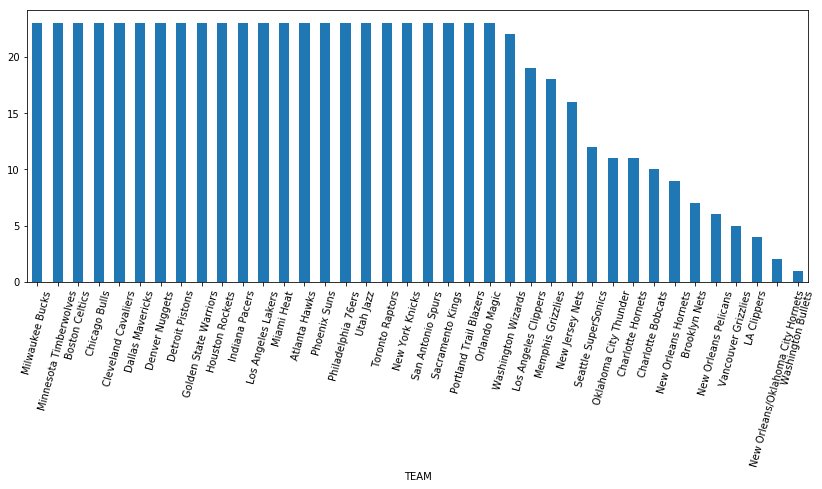

In [0]:
fig, ax = plt.subplots(0)
ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False).plot.bar(figsize=(14, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
plt.show()

In [0]:
def replace_team_name(name):
    if name == 'Seattle SuperSonics':
        return 'Oklahoma City Thunder'
    elif name == 'Charlotte Bobcats':
        return 'Charlotte Hornets'
    elif name == 'Vancouver Grizzlies':
        return 'Memphis Grizzlies'
    elif name == 'New Orleans Hornets' or name == 'New Orleans/Oklahoma City Hornets':
        return 'New Orleans Pelicans'
    elif name == 'Washington Bullets':
        return 'Washington Wizards'
    elif name == 'Los Angeles Clippers':
        return 'LA Clippers'
    elif name == 'New Jersey Nets':
        return 'Brooklyn Nets'
    return name

In [0]:
df['TEAM'] = df['TEAM'].apply(replace_team_name)

In [0]:
num_of_teams = df['TEAM'].unique()

assert len(num_of_teams) == 30

num_of_teams


array(['Atlanta Hawks', 'Boston Celtics', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets',
       'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
       'Indiana Pacers', 'LA Clippers', 'Los Angeles Lakers',
       'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks',
       'Minnesota Timberwolves', 'Brooklyn Nets', 'New Orleans Pelicans',
       'New York Knicks', 'Orlando Magic', 'Philadelphia 76ers',
       'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings',
       'San Antonio Spurs', 'Oklahoma City Thunder', 'Toronto Raptors',
       'Utah Jazz', 'Washington Wizards', 'Charlotte Hornets'],
      dtype=object)

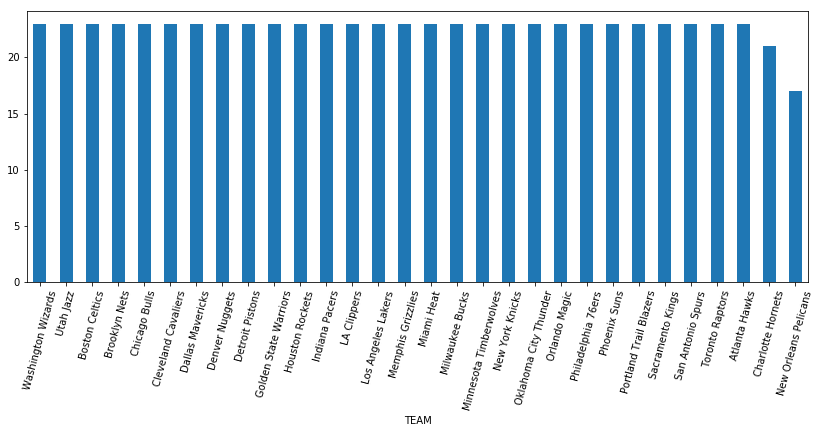

In [0]:
fig, ax = plt.subplots(0)
ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False).plot.bar(figsize=(14, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
plt.show()

In [0]:
def average_shooting_dist(s):
    sum_all_distances = 1 * s['FGA-C'] + 2 * s['FGA-M'] + 3 * s['FGA-L'] + 4 * s['FGA-T']
    num_of_attempts = s['FGA-C'] + s['FGA-M'] + s['FGA-L'] + s['FGA-T']
    return sum_all_distances / num_of_attempts

In [0]:
df['avg_shot_dist'] = df.apply(average_shooting_dist, axis=1)

In [0]:
def custom_split(s):
  return s.split('-')[0]

df['TEAM-YEAR'] = df.TEAM + '-' + df.YEAR_SPAN.apply(custom_split)


In [0]:
df

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR,avg_shot_dist,TEAM-YEAR
0,Atlanta Hawks,1403,2701,51.9,460,1241,37.1,547,1338,40.9,419,1245,33.7,2003-2004,2003,2.172720,Atlanta Hawks-2003
1,Boston Celtics,1330,2453,54.2,362,939,38.6,598,1425,42.0,553,1583,34.9,2003-2004,2003,2.334062,Boston Celtics-2003
2,Chicago Bulls,1283,2547,50.4,418,1206,34.7,667,1744,38.2,429,1239,34.6,2003-2004,2003,2.248664,Chicago Bulls-2003
3,Cleveland Cavaliers,1565,3010,52.0,622,1630,38.2,488,1326,36.8,247,771,32.0,2003-2004,2003,1.978922,Cleveland Cavaliers-2003
4,Dallas Mavericks,1668,2969,56.2,510,1221,41.8,637,1584,40.2,506,1433,35.3,2003-2004,2003,2.205495,Dallas Mavericks-2003
5,Denver Nuggets,1601,2887,55.5,391,1057,37.0,670,1832,36.6,330,974,33.9,2003-2004,2003,2.132296,Denver Nuggets-2003
6,Detroit Pistons,1459,2794,52.2,533,1424,37.4,422,1128,37.4,333,960,34.7,2003-2004,2003,2.040279,Detroit Pistons-2003
7,Golden State Warriors,1547,2862,54.1,334,949,35.2,566,1419,39.9,427,1260,33.9,2003-2004,2003,2.165948,Golden State Warriors-2003
8,Houston Rockets,1229,2312,53.2,474,1169,40.5,521,1311,39.7,514,1380,37.2,2003-2004,2003,2.284997,Houston Rockets-2003
9,Indiana Pacers,1312,2508,52.3,486,1292,37.6,506,1240,40.8,448,1267,35.4,2003-2004,2003,2.200729,Indiana Pacers-2003


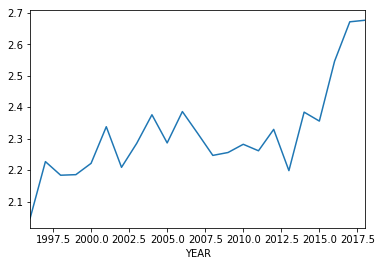

In [0]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['avg_shot_dist'])
a['Houston Rockets'].plot()

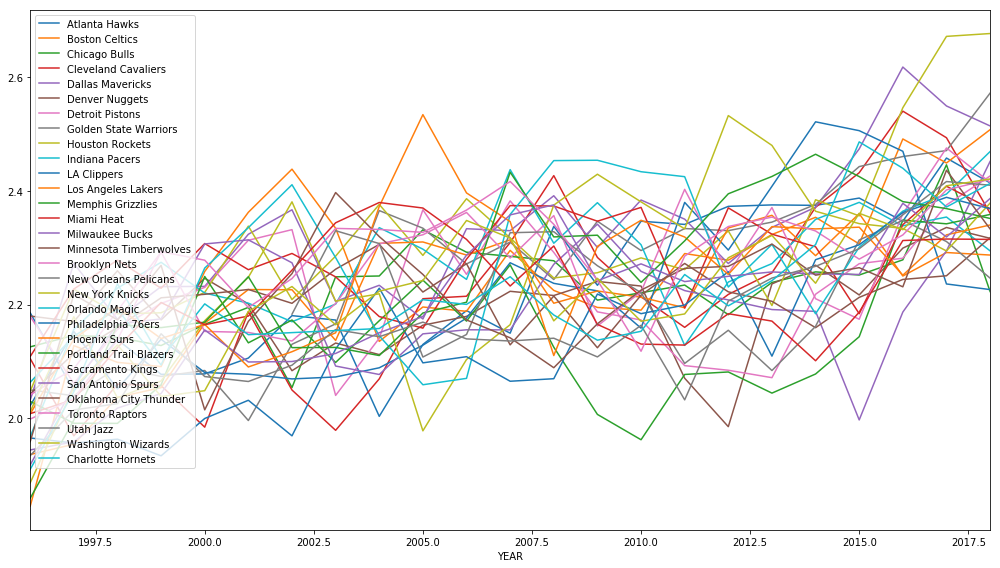

In [0]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['avg_shot_dist'])
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

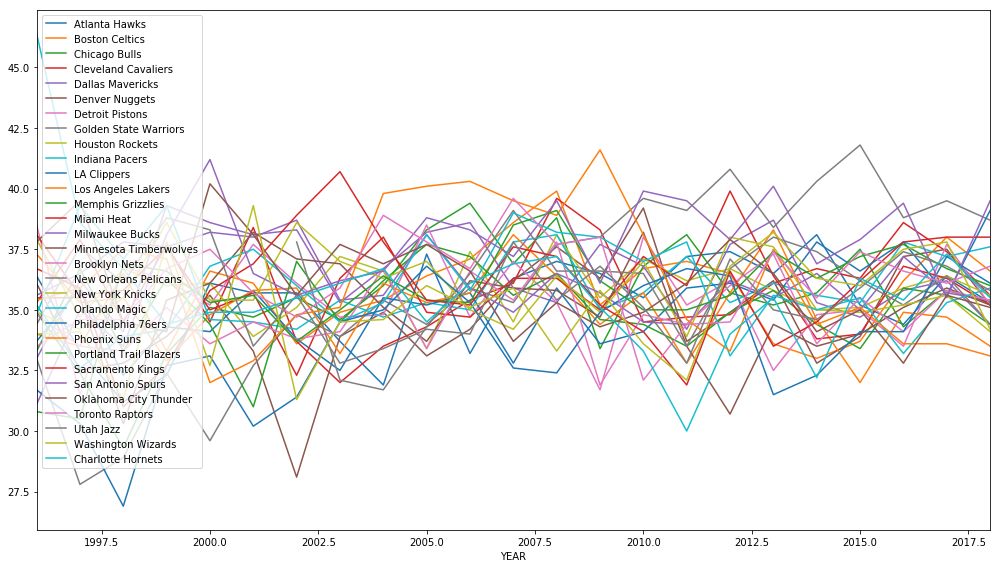

In [0]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FG%-T'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

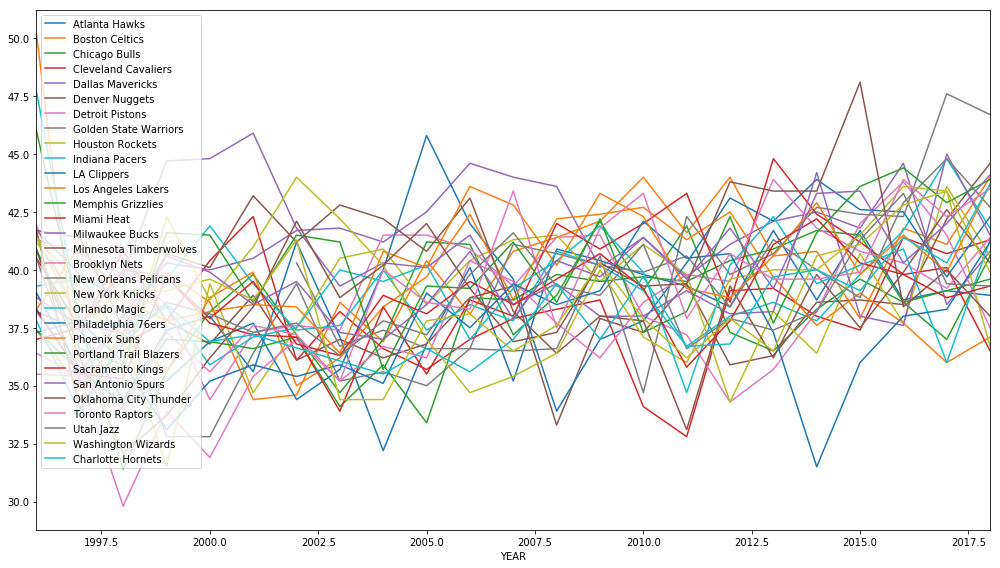

In [0]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FG%-M'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

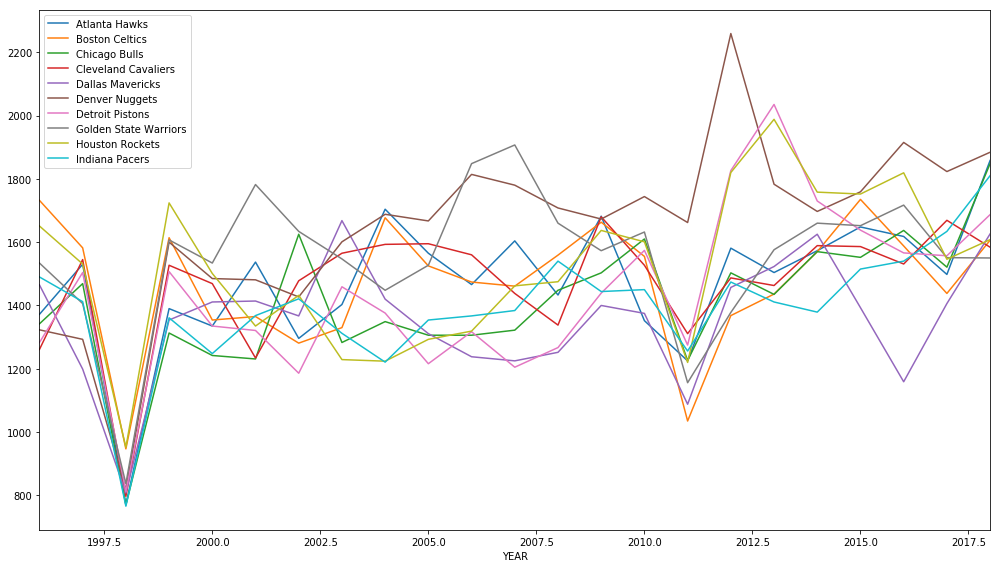

In [0]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FGM-C'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
    if j == 10: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
#test2019 = pd.read_csv('Shot Data - CSV/Shot Data - 2018-2019.csv')
test2019 = pd.read_csv('Shot Data - 2018-2019.csv')
test2019.head()

,Unnamed: 0,LESS THAN 8FT.,Unnamed: 2,Unnamed: 3,8-16 FT.,Unnamed: 5,Unnamed: 6,16-24 FT.,Unnamed: 8,Unnamed: 9,24+ FT.,Unnamed: 11,Unnamed: 12
0,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T
1,Atlanta Hawks,1858,3275,56.7,334,859,38.9,136,359,37.9,1064,3010,35.3
2,Boston Celtics,1606,2687,59.8,484,1100,44,329,809,40.7,1032,2820,36.6
3,Brooklyn Nets,1773,3197,55.5,349,843,41.4,138,360,38.3,1040,2940,35.4
4,Charlotte Hornets,1690,3081,54.9,386,883,43.7,244,618,39.5,975,2743,35.5


# Shot Distance Percentage Chart

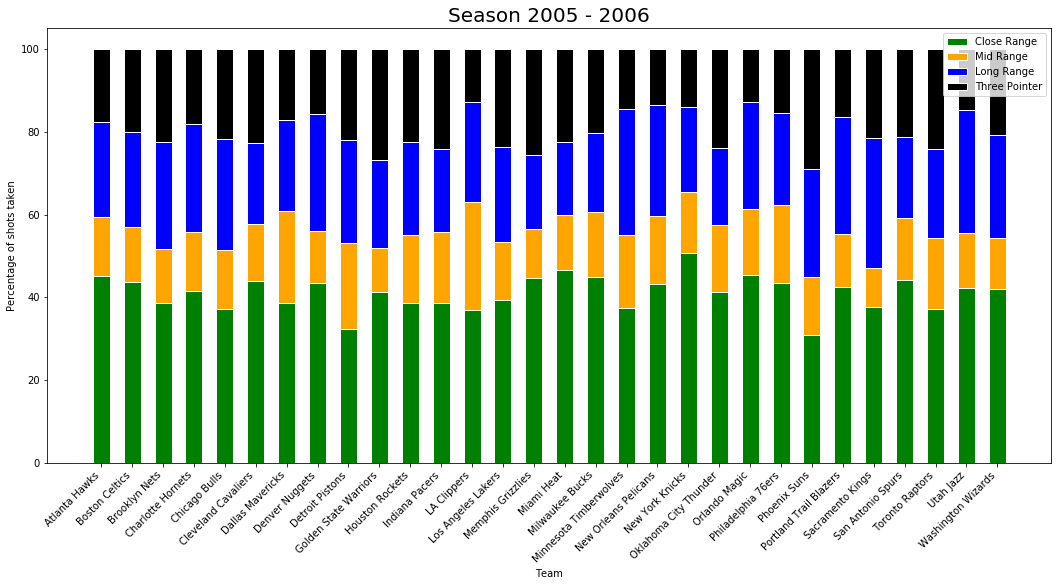

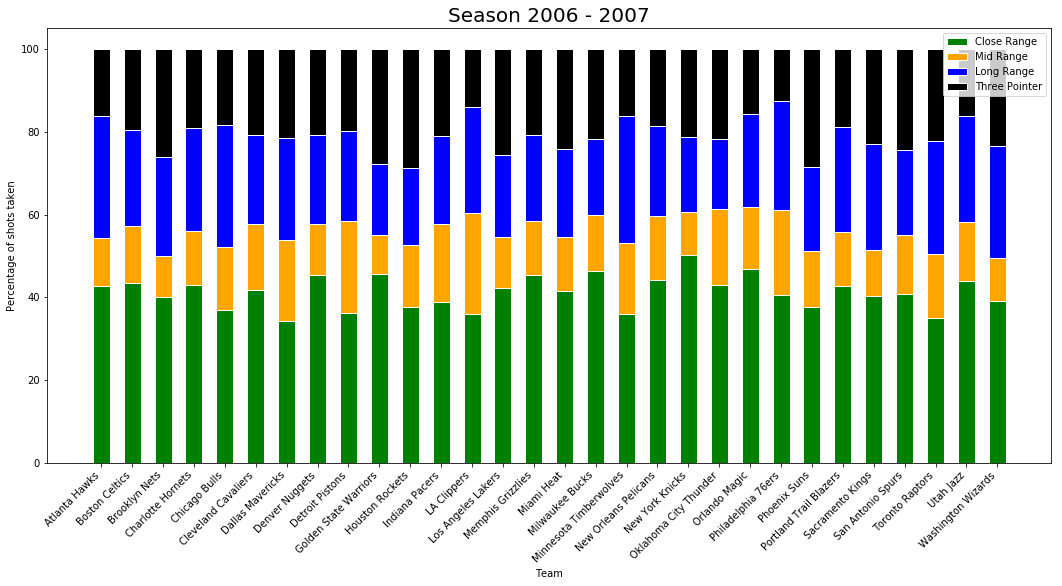

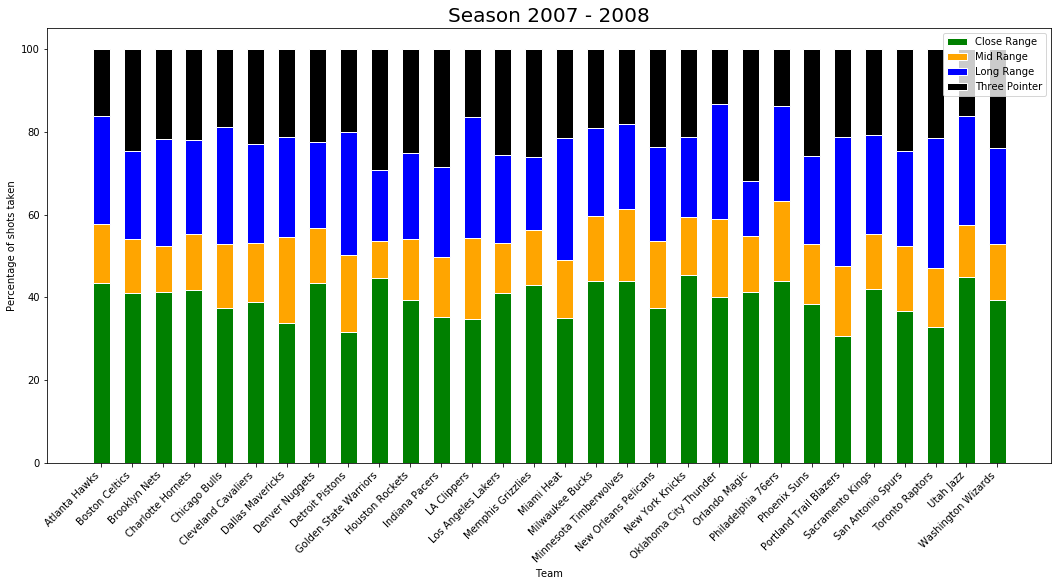

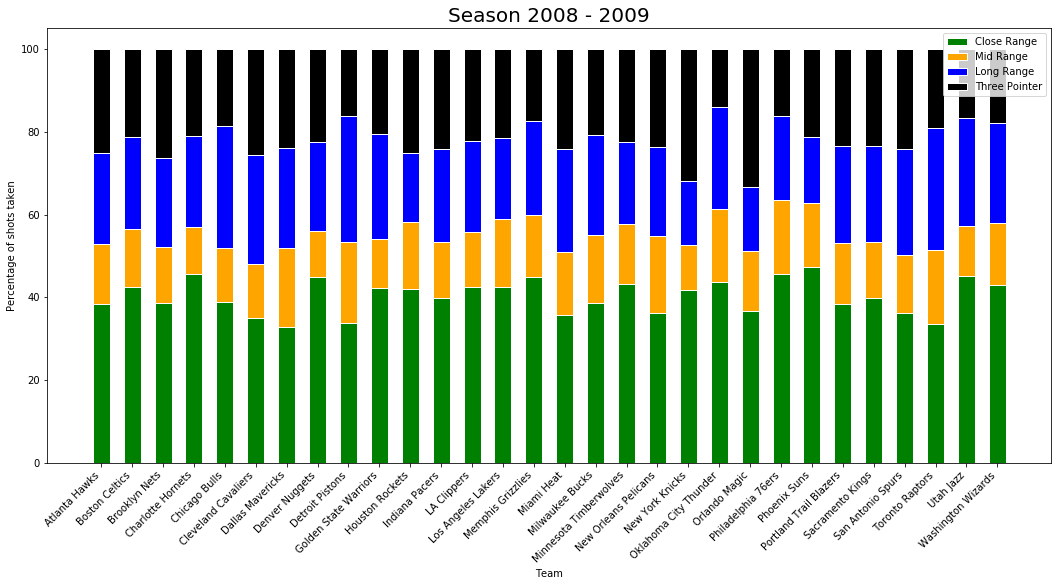

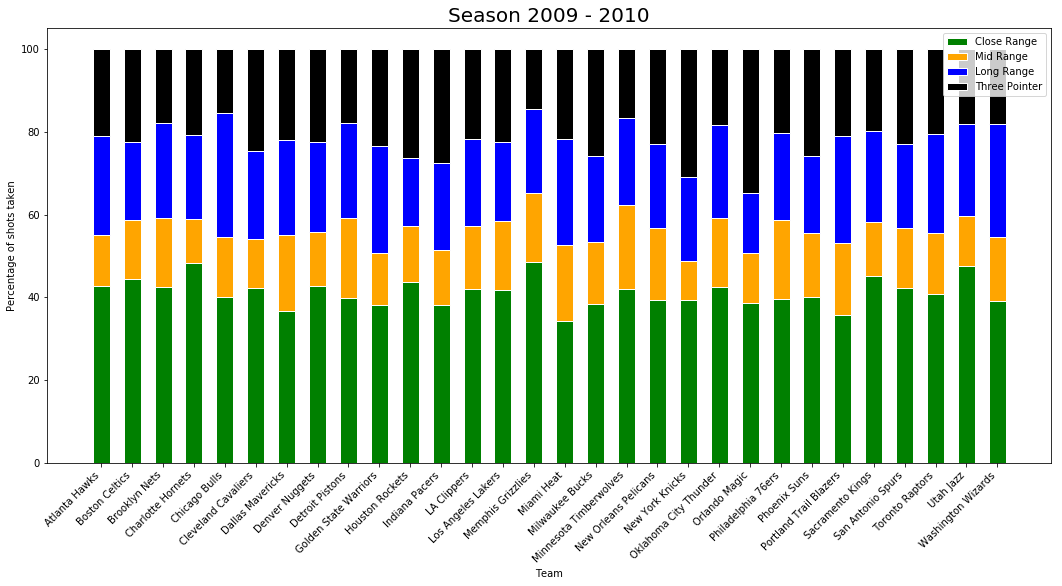

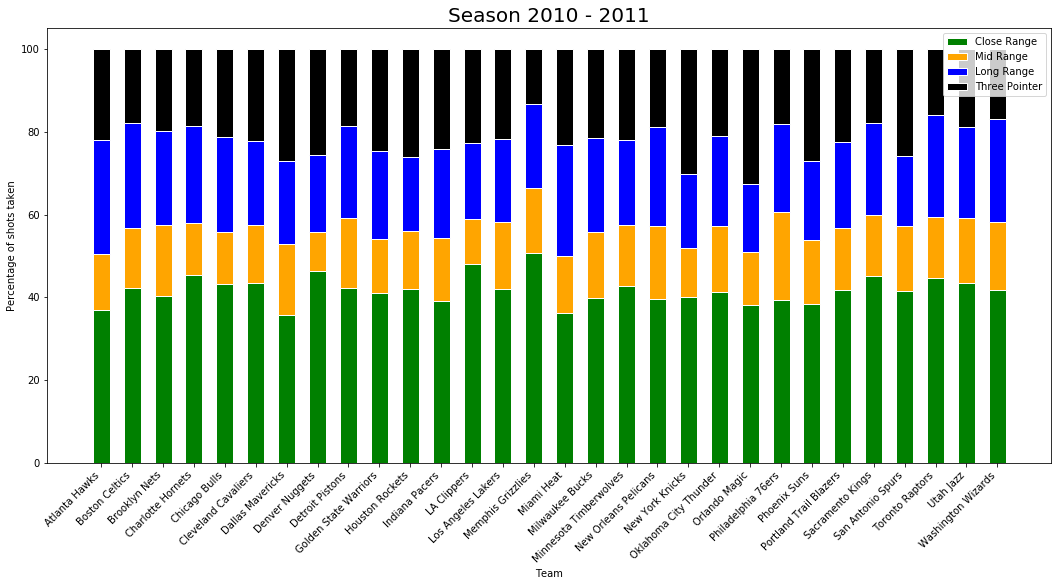

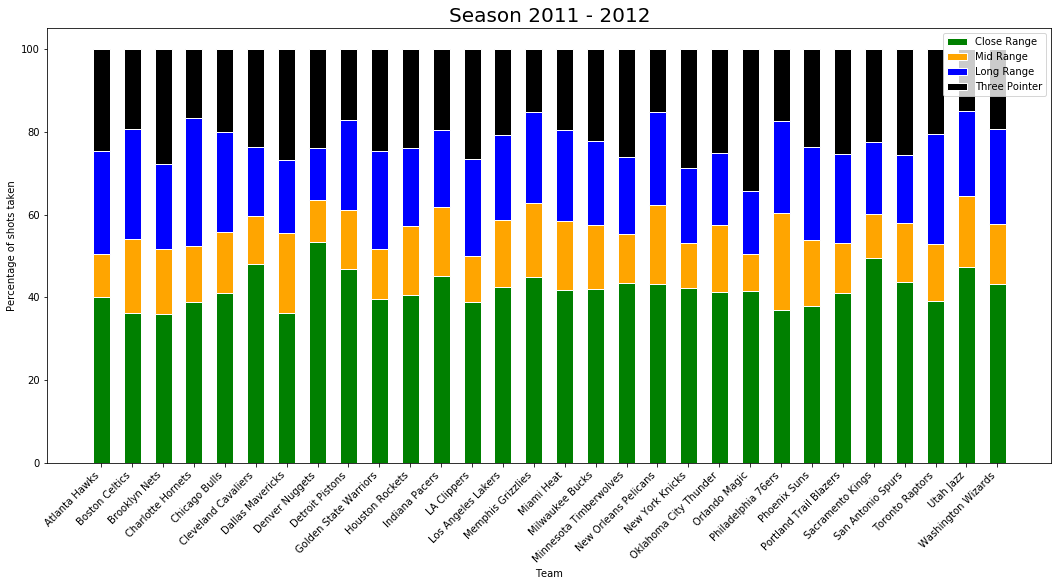

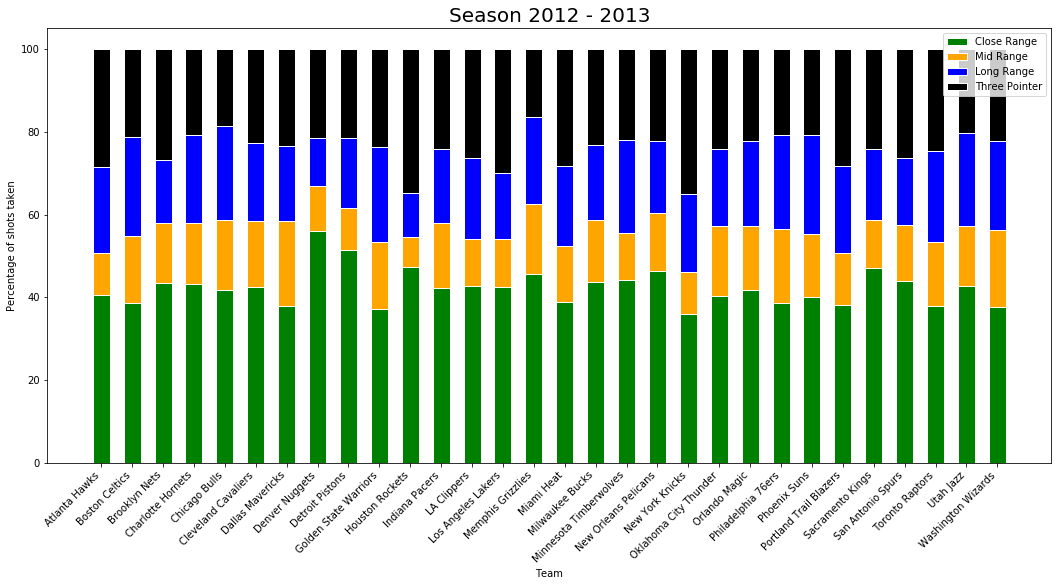

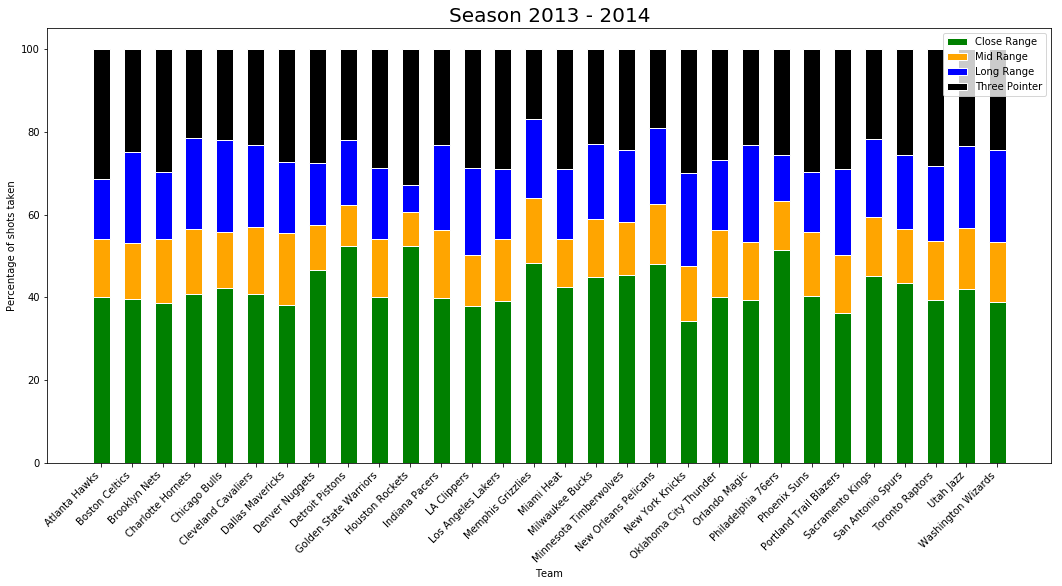

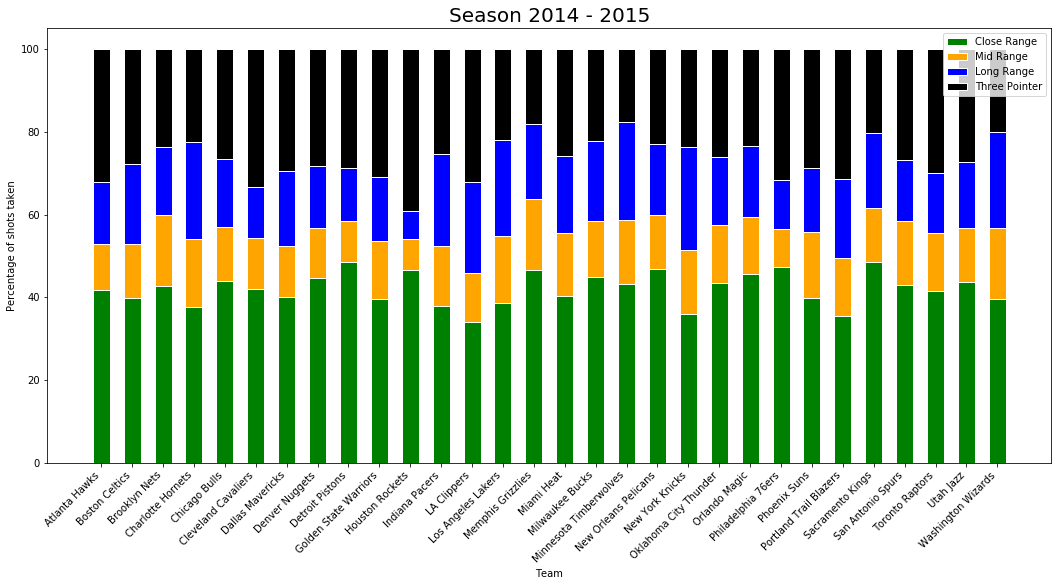

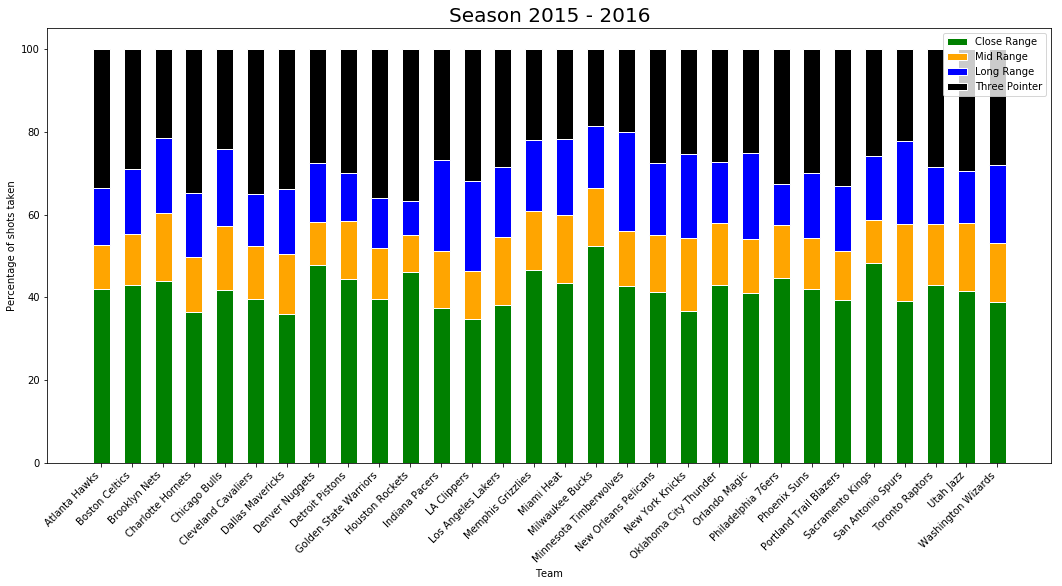

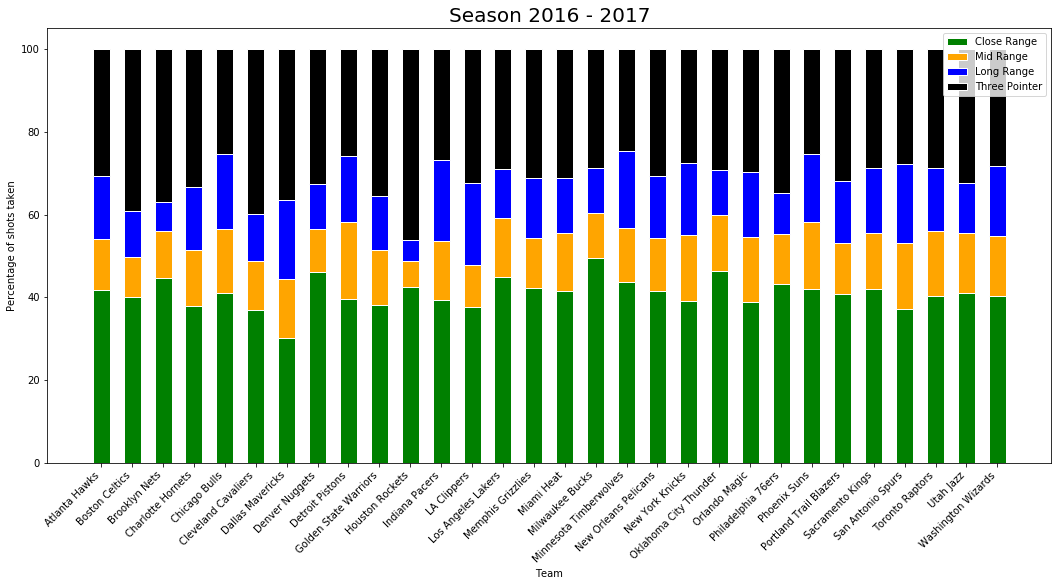

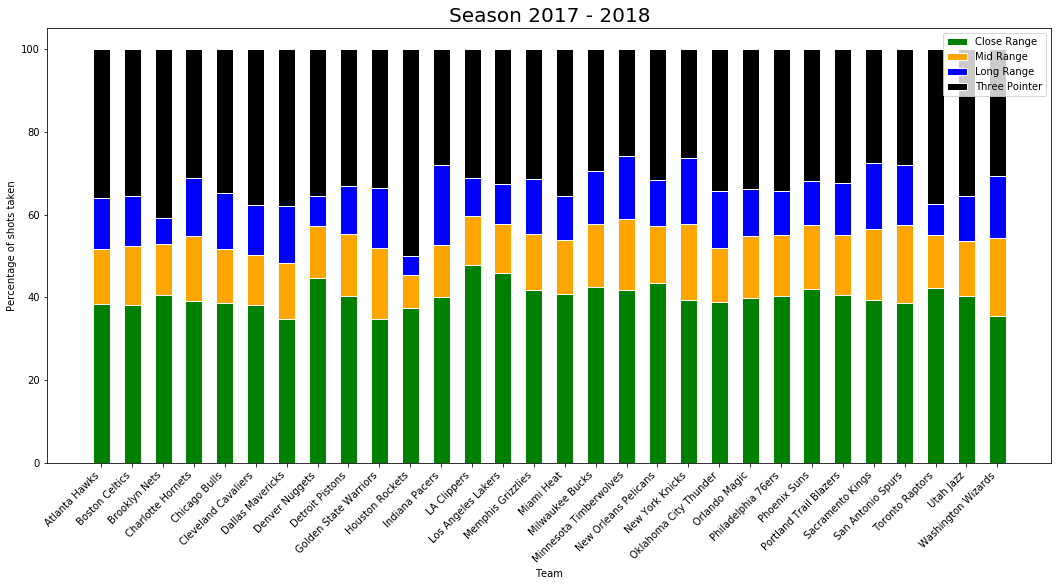

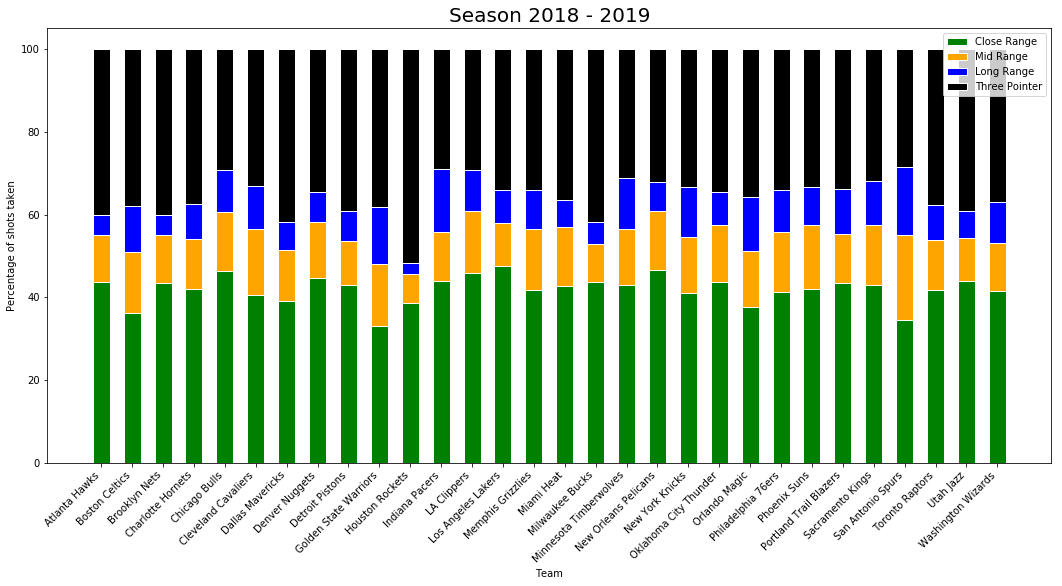

In [0]:
a = df.groupby('YEAR').apply(lambda df_: df_.set_index('TEAM', drop=True).sort_index())

for year in range(2005, 2019):

  # Create a figure with a single subplot
  f, ax = plt.subplots(1, figsize=(18,8))


  # Create the total Field Goal Attempted by each team 
  totals = [i+j+k+l for i,j,k,l in zip(a.loc[year]['FGA-C'], a.loc[year]['FGA-M'], a.loc[year]['FGA-L'], a.loc[year]['FGA-T'])]

  # Create the percentage of the close range shot attempts ove total shot attempts
  close = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-C'], totals)]

  # Create the percentage of the mid range shot attempts ove total shot attempts
  mid = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-M'], totals)]

  # Create the percentage of the long range shot attempts ove total shot attempts
  long = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-L'], totals)]

  # Create the percentage of the three point shot attempts ove total shot attempts
  threes = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-T'], totals)]

  team = a.loc[2018].index

  barWidth = 0.55
  # Create green Bars
  p1 = plt.bar(team, close, color='green', edgecolor='white', width=barWidth)
  # Create orange Bars
  p2 = plt.bar(team, mid, bottom=close, color='orange', edgecolor='white', width=barWidth)
  # Create blue Bars
  p3 = plt.bar(team, long, bottom=[i+j for i,j in zip(close, mid)], color='blue', edgecolor='white', width=barWidth)
  # Create black Bars
  p4 = plt.bar(team, threes, bottom=[i+j+k for i,j,k in zip(close, mid, long)], color='black', edgecolor='white', width=barWidth)
  
  plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
  
  plt.title('Season ' + str(year) + ' - ' + str(year+1) , fontsize=20)
  plt.xlabel('Team')
  plt.ylabel('Percentage of shots taken')
  plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Close Range', 'Mid Range', 'Long Range', 'Three Pointer'))

  plt.show()


# Winning Data

In [0]:
def standarize_team_name(name):
  out = name.split('(')[0]
  out = out.replace('*', '')
  out = out.strip()
  
  return out


In [0]:
big_df = []

division = ['Atlantic Division', 'Central Division', 'Northwest Division', 'Southeast Division', 'Southwest Division', 'Pacific Division', 'Midwest Division']


for year in range(1997, 2020):
  nba_year = 'https://www.basketball-reference.com/leagues/NBA_'+ str(year) + '_standings.html'
  data = pd.read_html(nba_year)

  data = data[:2]

  data[0] = data[0].rename(index=str, columns={"Eastern Conference": "TEAM"})
  data[1] = data[1].rename(index=str, columns={"Western Conference": "TEAM"})

  df_data = pd.concat(data, sort=False)

  df_data['TEAM'] = df_data['TEAM'].apply(standarize_team_name)

  df_data = df_data.drop(columns = ['GB', 'SRS'])

  for div in division:
    df_data = df_data[df_data.TEAM != div]

  df_data['YEAR_SPAN'] = str(year - 1) + '-' + str(year)
  df_data['YEAR'] = str(year - 1)
  big_df.append(df_data)

  
  
big_df = pd.concat(big_df, sort=False)

In [0]:
big_df['TEAM'] = big_df['TEAM'].apply(replace_team_name)
big_df['TEAM-YEAR'] = big_df['TEAM'] + '-' + big_df['YEAR']

big_df

In [0]:

big_df = big_df.drop(columns = ['TEAM', 'YEAR_SPAN', 'YEAR'])
big_df

,W,L,W/L%,PS/G,PA/G,TEAM-YEAR
1,61,21,.744,94.8,89.3,Miami Heat-1996
2,57,25,.695,95.4,92.2,New York Knicks-1996
3,45,37,.549,94.1,94.5,Orlando Magic-1996
4,44,38,.537,99.4,97.7,Washington Wizards-1996
5,26,56,.317,97.2,101.8,Brooklyn Nets-1996
6,22,60,.268,100.2,106.7,Philadelphia 76ers-1996
7,15,67,.183,100.6,107.9,Boston Celtics-1996
9,69,13,.841,103.1,92.3,Chicago Bulls-1996
10,56,26,.683,94.8,89.4,Atlanta Hawks-1996
11,54,28,.659,94.2,88.9,Detroit Pistons-1996


In [0]:
final_df = pd.merge(df, big_df, on='TEAM-YEAR', copy=False)
final_df

# Season 1998-1999 played 50 games, Season 2011-2012 played 66 games instead of 82 because of lock out!

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR,avg_shot_dist,TEAM-YEAR,W,L,W/L%,PS/G,PA/G
0,Atlanta Hawks,1390,2528,55.0,748,2002,37.4,605,1467,41.2,256,793,32.3,1999-2000,1999,2.077320,Atlanta Hawks-1999,28,54,.341,94.3,99.7
1,Boston Celtics,1614,3140,51.4,485,1215,39.9,539,1269,42.5,416,1248,33.3,1999-2000,1999,2.090949,Boston Celtics-1999,35,47,.427,99.3,100.1
2,Charlotte Hornets,1449,2608,55.6,616,1601,38.5,533,1330,40.1,337,981,34.4,1999-2000,1999,2.104908,Charlotte Hornets-1999,49,33,.598,98.4,95.8
3,Chicago Bulls,1313,2606,50.4,424,1191,35.6,489,1351,36.2,339,1022,33.2,1999-2000,1999,2.127877,Chicago Bulls-1999,17,65,.207,84.8,94.2
4,Cleveland Cavaliers,1527,2959,51.6,502,1329,37.8,605,1527,39.6,343,909,37.7,1999-2000,1999,2.057406,Cleveland Cavaliers-1999,32,50,.390,97.0,100.5
5,Dallas Mavericks,1354,2533,53.5,666,1652,40.3,659,1539,42.8,515,1311,39.3,1999-2000,1999,2.231414,Dallas Mavericks-1999,40,42,.488,101.4,102.0
6,Denver Nuggets,1600,2873,55.7,506,1340,37.8,482,1302,37.0,468,1382,33.9,1999-2000,1999,2.172974,Denver Nuggets-1999,35,47,.427,99.0,101.1
7,Detroit Pistons,1507,2670,56.4,447,1162,38.5,651,1580,41.2,439,1214,36.2,1999-2000,1999,2.201932,Detroit Pistons-1999,42,40,.512,103.5,102.0
8,Golden State Warriors,1607,3179,50.6,426,1300,32.8,621,1596,38.9,341,1054,32.4,1999-2000,1999,2.073643,Golden State Warriors-1999,19,63,.232,95.5,103.8
9,Houston Rockets,1724,3062,56.3,281,893,31.5,418,1093,38.2,577,1601,36.0,1999-2000,1999,2.185441,Houston Rockets-1999,34,48,.415,99.5,100.3
